In [83]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import warnings
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import f1_score
random_state =537
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 50)
from sklearn.preprocessing import LabelEncoder
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

import time

# import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
import gc
gc.collect()

17808

In [84]:
cat = {'2HP ELITEBOOK 850V6':"computer",
 '2LOGITECH PEBBLE M350 BLUETOOTH MOUSE':"computer acs",
 '2MICROSOFT OFFICE HOME AND STUDENT 2019,':"computer acs",
 '2TARGUS GEOLITE ESSENTIAL CASE':"computer acs",
 '2TOSHIBA PORTABLE HARD DRIVE':"computer acs",
 '6  SPACE GREY 32GB':"phone",
 'AERIALS REMOTE CONTROLS':"others",
 'APPLE PRODUCTDESCRIPTION':"others",
 'APPLE S':"phone",
 'AUDIO ACCESSORIES':"electric",
 'BABY & CHILD TRAVEL':"baby",
 'BABY CHANGING':"baby",
 'BABY CHILD TRAVEL':"baby",
 'BABY FEEDING':"baby",
 'BABY PLAY EQUIPMENT':"baby",
 'BABYWEAR':"baby",
 'BAGS & CARRY CASES':"bags",
 'BAGS CARRY CASES':"bags",
 'BAGS WALLETS ACCESSORIES':"bags",
 'BAGS, WALLETS & ACCESSORIES':"bags",
 'BARBECUES & ACCESSORIES':"hobi ve oyun",
 'BARBECUES ACCESSORIES':"hobi ve oyun",
 'BARWARE':"others",
 'BATH & BODYCARE':"skincare and healt",
 'BATH BODYCARE':"skincare and healt",
 'BATH LINEN':"skincare and healt",
 'BATHROOM':"home",
 'BATHROOM ACCESSORIES':"home",
 'BATHROOM FIXTURES':"home",
 'BED LINEN':"home",
 'BEDROOM FURNITURE':"home",
 'BLANK MEDIA & MEDIA STORAGE':"computer acs",
 'BLANK MEDIA MEDIA STORAGE':"computer acs",
 'BOOKS':"hobi ve oyun",
 'BOYSWEAR':"erkek giyim",
 'CABLES & ADAPTERS':"electric",
 'CABLES ADAPTERS':"electric",
 'CARPETS RUGS FLOORING':"home",
 'CARPETS, RUGS & FLOORING':"home",
 'CHILDREN S ACCESSORIES':"childeren",
 'CHILDREN S FOOTWEAR':"childeren",
 'CHILDREN S FURNITURE':"home",
 'CHILDRENS FOOTWEAR':"childeren",
 'CHRISTMAS DECORATIONS':"home",
 'COMPUTER NETWORKING':"computer acs",
 'COMPUTER PERIPHERALS & ACCESSORIES':"computer acs",
 'COMPUTER PERIPHERALS ACCESSORIES':"computer acs",
 'COMPUTER SOFTWARE':"computer acs",
 'COMPUTERS':"computer",
 'COOKING APPLIANCES':"kitchen",
 'COOKWARE':"kitchen",
 'CRAFT':"hobi ve oyun",
 'DECORATING':"home",
 'DECORATIVE ACCESSORIES':"home",
 'DIARIES & ORGANISERS':"hobi ve oyun",
 'DIARIES ORGANISERS':"hobi ve oyun",
 'DISPOSABLE TABLEWARE CUTLERY':"kitchen",
 'DOOR FURNITURE':"home",
 'DRESSMAKING':"hobi ve oyun",
 'EASTER DECORATIONS':"home",
 'FACIAL SKINCARE':"skincare and healt",
 'FILING DESK ACCESSORIES':"home",
 'FITTED KITCHENS':"kitchen",
 'FOOD PREPARATION':"kitchen",
 'FOOD STORAGE':"kitchen",
 'FRAGRANCE':"skincare and healt",
 'FULFILMENT CHARGE':"others",
 'GAMES':"hobi ve oyun",
 'GAMING':"hobi ve oyun",
 'GARDENING EQUIPMENT':"hobi ve oyun",
 'GIFT FOOD DRINK':"kitchen",
 'GIFT WRAP':"hobi ve oyun",
 'GIRLSWEAR':"kadın giyim",
 'GREETING CARDS & PERSONALISED STATIONERY':"hobi ve oyun",
 'GREETING CARDS PERSONALISED STATIONERY':"hobi ve oyun",
 'GYM EQUIPMENT':"hobi ve oyun",
 'HAIRCARE':"skincare and healt",
 'HEALTH & BEAUTY ELECTRICAL':"skincare and healt",
 'HEALTH BEAUTY ACCESSORIES':"skincare and healt",
 'HEALTH BEAUTY ELECTRICAL':"skincare and healt",
 'HEATING & COOLING APPLIANCES':"home",
 'HEATING COOLING APPLIANCES':"home",
 'HI-FI':"electric",
 'HOME AND PERSONAL SECURITY':"home",
 'HOME OFFICE':"home",
 'HOME SAFETY EQUIPMENT':"home",
 'HOT DRINK PREPARATION':"kitchen",
 'HOUSEHOLD CLEANING':"home",
 'HP ELITEBOOK 850V6':"computer",
 'IMAGING ACCESSORIES':"others",
 'IMAGING EQUIPMENT':"others",
 'JEWELLERY & WATCHES':"JEWELLERY & WATCHES",
 'JEWELLERY WATCHES':"JEWELLERY & WATCHES",
 'KITCHEN ACCESSORIES':"kitchen",
 'KITCHEN SCALES & MEASURES':"kitchen",
 'KITCHEN SCALES MEASURES':"kitchen",
 'KITCHEN STORAGE':"kitchen",
 'KITCHEN UTENSILS & GADGETS':"kitchen",
 'KITCHEN UTENSILS GADGETS':"kitchen",
 'LAUNDRY & CLOTHESCARE':"home",
 'LAUNDRY CLOTHESCARE':"home",
 'LIGHTING':"home",
 'LINGERIE & HOISERY':"home",
 'LINGERIE HOISERY':"kadın giyim",
 'LIVING & DINING FURNITURE':"home",
 'LIVING DINING FURNITURE':"home",
 'LOGITECH PEBBLE M350 BLUETOOTH MOUSE':"computer acs",
 'LUGGAGE':"others",
 'MAKEUP':"kadın giyim",
 'MEN S ACCESSORIES':"erkek giyim",
 'MEN S CLOTHES':"erkek giyim",
 'MEN S FOOTWEAR':"erkek giyim",
 'MEN S NIGHTWEAR':"erkek giyim",
 'MEN S SPORTSWEAR':"erkek giyim",
 'MEN S UNDERWEAR SOCKS':"erkek giyim",
 'MENS CLOTHES':"erkek giyim",
 'MENS NIGHTWEAR':"erkek giyim",
 'MENS UNDERWEAR & SOCKS':"erkek giyim",
 'MICROSOFT OFFICE HOME AND STUDENT 2019,':"computer acs",
 'NURSERY ACCESSORIES':"bebek",
 'NURSERY EQUIPMENT FURNITURE':"bebek",
 'NURSERY FURNITURE':"bebek",
 'NURSERY LINEN':"bebek",
 'NURSERY TOYS':"bebek",
 'OUTDOOR ACCESSORIES':"OUTDOOR",
 'OUTDOOR FURNITURE':"OUTDOOR",
 'PAPER NOTEBOOKS':"school",
 'PARTY DECORATIONS':"hobi ve oyun",
 'PENS PENCILS':"school",
 'PICNICWARE':"OUTDOOR",
 'PORTABLE AUDIO EQUIPMENT':"electric",
 'POWER & BATTERIES':"electric",
 'POWER BATTERIES':"electric",
 'PRESERVING & BAKING EQUIPMENT':"kitchen",
 'PRESERVING BAKING EQUIPMENT':"kitchen",
 'PRINTERS & SCANNERS':"computer acs",
 'PRINTERS SCANNERS':"computer acs",
 'PRODUCT':"others",
 'SCHOOLWEAR':"school",
 'SERVICE':"others",
 'SOFT FURNISHINGS':"home",
 'SPORTS EQUIPMENT':"hobi ve oyun",
 'STANDS & BRACKETS':"electric",
 'STANDS BRACKETS':"electric",
 'STATIONERY SUNDRIES':"school",
 'STORAGE & ORGANISATION':"home",
 'STORAGE ORGANISATION':"home",
 'SUNCARE':"skincare and healt",
 'SUNGLASSES & READING GLASSES':"JEWELLERY & WATCHES",
 'SUNGLASSES READING GLASSES':"JEWELLERY & WATCHES",
 'TABLE LINEN':"home",
 'TABLEWARE':"home",
 'TARGUS GEOLITE ESSENTIAL CASE':"computer acs",
 'TECHNOLOGY ACCESSORIES':"electric",
 'TELEPHONE ACCESSORIES':"electric",
 'TELEPHONES FAX MACHINES TWO-WAY RADIOS':"electric",
 'TELEPHONES, FAX MACHINES & TWO-WAY RADIOS':"electric",
 'TELEVISIONS & HOME CINEMA':"electric",
 'TELEVISIONS HOME CINEMA':"electric",
 'THEMED GIFTS':"hobi ve oyun",
 'TOSHIBA PORTABLE HARD DRIVE':"computer acs",
 'TOYS':"hobi ve oyun",
 'UNKNOWN':"others",
 'VIDEOS DVD DIGITAL EQUIPMENT':"electric",
 'WARRANTY':"others",
 'WINDOW DRESSING':"home",
 'WOMEN S ACCESSORIES':"kadın giyim",
 'WOMEN S CLOTHES':"kadın giyim",
 'WOMEN S FOOTWEAR':"kadın giyim",
 'WOMEN S NIGHTWEAR':"kadın giyim",
 'WOMENS ACCESSORIES':"kadın giyim",
 'WOMENS CLOTHES':"kadın giyim",
 'WOMENS FOOTWEAR':"kadın giyim"}

In [85]:
sub= pd.read_csv("sample_submission.csv")
test= pd.read_csv("submission_data_x.csv")
train= pd.read_csv("train_dataset.csv")

In [86]:
# #model item bağıntısı ile item isimlerini düzeltme #1
# a = pd.DataFrame()
# for i in tqdm(sepet):
#     temp = pd.DataFrame(train.groupby([i[3],i[0]]).count().ID).reset_index().sort_values(by=["ID"],ascending=False).drop_duplicates([i[3]],keep="first").rename(columns={i[3]:"model",i[0]:"item","ID":"amaount"})
#     a = pd.concat([a,temp],axis=0)
# a = pd.DataFrame(a.sort_values(by=["amaount"],ascending=False).drop_duplicates(["model"],keep="first"))
# def nan_maker(row):
#     if(row.model.startswith("RETAILER")):
#         row.model = np.nan
#     if row["item"]in ["UNKNOWN","FULFILMENT CHARGE","BARWARE","PRODUCT","SERVICE"]:
#         row["item"]= np.nan
#     return row
# a = a.apply(nan_maker,axis=1).dropna().rename(columns={"model":"model1","item":"item1"})
# mapper = dict(zip(a.model1, a.item1))
# def abow(x):
#     model = x.index[0]
#     itemm = x.index[1]

#     if x[model] in mapper.keys():
#         return mapper[x[model]]
#     return x[itemm]
# for i in sepet:
#     train.loc[:,i[0]] = train.loc[:,[i[3]]+[i[0]]].apply(abow,axis=1)
#     test.loc[:,i[0]] = test.loc[:,[i[3]]+[i[0]]].apply(abow,axis=1)

In [87]:
train.shape,test.shape

((74230, 147), (18558, 146))

In [88]:
train["fraud_flag"].value_counts()

fraud_flag
0    73176
1     1054
Name: count, dtype: int64

In [89]:

items = [col for col in train.columns if col.startswith("item") ]
cash_prices  = [col for col in train.columns if col.startswith("cash") ]
makes   = [col for col in train.columns if col.startswith("make") ]
models  = [col for col in train.columns if col.startswith("model") ]
goods_codes  = [col for col in train.columns if col.startswith("good") ]
Nbr_of_prod_purchass  = [col for col in train.columns if col.startswith("Nbr") ]
old_pov = train.columns
kalan = ["ID","Nb_of_items"]
label = "fraud_flag"
groups = [cash_prices]+[makes]+[models]+[goods_codes]+[Nbr_of_prod_purchass]#+[item]



In [90]:
sum_model_list = []
for i in groups+[items]:
    print("-"*5,i[0][:-1],"-"*50)
    train_item_list = []
    test_item_list = []

    for ii in i:
        train_item_list.extend(list(train[ii].unique()))
        test_item_list.extend(list(test[ii].unique()))

    train_item_list = set(train_item_list)
    test_item_list = set(test_item_list)

    sum_item_list = train_item_list.copy()
    sum_item_list.update(test_item_list)
    if(i == groups[2]):
        sum_model_list = sum_item_list.copy()
    if(i == groups[3]):
        sum_no_list = sum_item_list.copy()
    print("train:",len(train_item_list),"test:",len(test_item_list),"toplam unique:",len(sum_item_list),"teste özgü:",len(test_item_list-train_item_list),"traine özgü",len(train_item_list-test_item_list))

----- cash_price --------------------------------------------------
train: 1533 test: 1024 toplam unique: 1640 teste özgü: 107 traine özgü 616
----- make --------------------------------------------------
train: 773 test: 421 toplam unique: 829 teste özgü: 56 traine özgü 408
----- model --------------------------------------------------
train: 8579 test: 3489 toplam unique: 9668 teste özgü: 1089 traine özgü 6179
----- goods_code --------------------------------------------------
train: 15645 test: 5930 toplam unique: 17847 teste özgü: 2202 traine özgü 11917
----- Nbr_of_prod_purchas --------------------------------------------------
train: 43 test: 36 toplam unique: 66 teste özgü: 23 traine özgü 30
----- item --------------------------------------------------
train: 169 test: 148 toplam unique: 174 teste özgü: 5 traine özgü 26


In [91]:
sepet = []
for i in range(1,25):
    lst = ["item","cash_price","make","model","goods_code","Nbr_of_prod_purchas"]
    for ii in range(0,len(lst)):
        lst[ii] = lst[ii]+str(i)
    sepet.append(lst)

In [92]:
train[train[label] == 1].Nb_of_items.value_counts()

Nb_of_items
1     490
2     466
3      72
4      11
5       5
6       2
19      2
20      1
8       1
16      1
11      1
14      1
22      1
Name: count, dtype: int64

In [93]:
sepet0 = train[sepet[0]+[label]]
sepet0 

,item1,cash_price1,make1,model1,goods_code1,Nbr_of_prod_purchas1,fraud_flag
0,COMPUTER PERIPHERALS ACCESSORIES,369,APPLE,APPLE WATCH SERIES 7 GPS 41MM STARLIGHT ALUMINIUM,240376608,1,0
1,BEDROOM FURNITURE,839,HYPNOS,HYPNOS SUPERB PILLOW TOP POCKET SPRING MATTRES...,236088594,1,0
2,LIVING DINING FURNITURE,4099,RETAILER,RETAILER BARBICAN 5 SEATER LEATHER CORN,237230181,1,0
3,COMPUTERS,1149,APPLE,2020 APPLE MACBOOK PRO 13 TOUCH BAR M1 PROCESS...,239246779,1,0
4,COMPUTERS,1187,APPLE,2020 APPLE MACBOOK PRO 13 TOUCH BAR M1 PROCESS...,239246780,1,0
...,...,...,...,...,...,...,...
74225,LIVING & DINING FURNITURE,899,SWOON,RETAILER,238971552,1,0
74226,COMPUTERS,949,APPLE,2020 APPLE MACBOOK AIR,239246776,1,0
74227,COMPUTERS,749,APPLE,2021 APPLE IPAD PRO 11 M1 PROCESSOR IOS WI-FI ...,240040984,1,0
74228,COMPUTER PERIPHERALS & ACCESSORIES,388,APPLE,APPLE WATCH SERIES 6,239001495,1,0


In [94]:
marka =["APPLE","LG","RETAILER","SAMSUNG","SONY"]

In [95]:
def item_exc(row):
    for idx, i in enumerate(items):
            row[row[i]] += 1*row[f"Nbr_of_prod_purchas{idx+1}"]
            row[f"{row[i]}_which_basket"] = idx+1
            row[f"{row[i]}_spending_money_amaount"] += row[f"cash_price{idx+1}"]
    return row
def marka_exc(row):
    for i in makes:
        if(row[i] in marka):
            row[row[i]] += 1
    return row

def program1(df):
    df = df.copy()
    
    df["sepet_toplam"] = df[cash_prices].sum(axis=1)
    df[Nbr_of_prod_purchass]=df[Nbr_of_prod_purchass].astype(float)
    
    #uppercat

#     for i in items:
#         df[i] = df[i].apply(lambda x:cat[x] if x in cat.keys() else np.nan)
        
#     for i in list(set(cat.values()))+[np.nan]:
#         df[i] = 0
#         df[f"{i}_which_basket"] = 0
#         df[f"{i}_spending_money_amaount"] = 0
        

    for i in marka+[np.nan]:
        df[i] = 0

    df = df.progress_apply(marka_exc,axis=1)   

    #subcat    
    for i in list(sum_item_list)+[np.nan]:
        df[i] = 0
        df[f"{i}_relevant"] = 0
        df[f"{i}_which_basket"] = 0
        df[f"{i}_spending_money_amaount"] = 0


    df = df.progress_apply(item_exc, axis=1)
    return df


In [96]:
train = program1(train)
test = program1(test)

wch_basket = [str(x) + "_which_basket" for x in list(sum_item_list)]
spend_money = [str(x) + "_spending_money_amaount" for x in list(sum_item_list)]
# cat_amount = list(set(cat.values()))
new_pov = ["sepet_toplam","Nb_of_items"]+list(sum_item_list)+wch_basket+spend_money+cash_prices+marka

# new_pov = ["sepet_toplam","Nb_of_items"]+list(sum_item_list2)

  0%|          | 0/74230 [00:00<?, ?it/s]

  0%|          | 0/74230 [00:00<?, ?it/s]

  0%|          | 0/18558 [00:00<?, ?it/s]

  0%|          | 0/18558 [00:00<?, ?it/s]

In [97]:
# apr = train.loc[train[label]==1,list(sum_item_list)].copy()
# apr = apr.rename(columns={np.nan:"gofuckyourself"})
# apr = apr.drop(["gofuckyourself"],axis=1)
# for i in apr.columns:
#     apr[i] = apr[i].apply(lambda x: False if x <= 0 else True).astype(bool)

In [98]:
# from mlxtend.frequent_patterns import apriori, association_rules 

# # Building the model 
# frq_items = apriori(apr, min_support = 0.05, use_colnames = True) 
  
# # Collecting the inferred rules in a dataframe 
# rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
# rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
# rules.head() 

In [99]:
# def ap_exc(row):
#     comp = row["COMPUTERS"] == 1
#     audio = row["AUDIO ACCESSORIES"] == 1
#     tel = row["TELEPHONES, FAX MACHINES & TWO-WAY RADIOS"] == 1
#     full = row["FULFILMENT CHARGE"] == 1
#     if(comp and audio):
#         return 1
#     elif(tel and full):
#         return 1
#     else:
#         return 0
    
# train["apriori"] = train.apply(ap_exc,axis=1)

In [100]:
# veri = train.loc[train[label] == 0,list(sum_item_list)][:-1].T.reset_index().rename(columns={"index":"ürünler"})
# veri = veri.dropna()
# veri.head(1)
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# # Veriyi DataFrame'e dönüştürme

# # TF-IDF Vektörize edici oluşturma
# tfidf_vectorizer = TfidfVectorizer()

# # Ürünleri TF-IDF matrisine dönüştürme
# tfidf_matrix = tfidf_vectorizer.fit_transform(veri['ürünler'])

# # Kozinüs benzerliği hesaplanması
# cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# # Sonuçları yazdırma
# print("Ürünler arasındaki kozinüs benzerliği:")
# print(cosine_sim)


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# veri.to_csv("veri_nonfraud.csv",index=False)
df = pd.read_csv("veri_nonfraud.csv")
# Sepetteki ürünler

# TF-IDF Vektörize edici oluşturma
tfidf_vectorizer = TfidfVectorizer()

# Ürünleri TF-IDF matrisine dönüştürme
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ürünler'])

# Kozinüs benzerliği hesaplanması
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# df = pd.read_csv("veri_all.csv")

def apr_exc(row):
    sepet_urunler = []
    for idx,i in enumerate(items):
        sepet_urunler.append(row[i])
        if(row["Nb_of_items"] == idx+1):
            break
            
    sepet_urun_indeksleri = [df[df['ürünler'] == urun].index[0] for urun in sepet_urunler]
    similarities_with_sepet = {}

    for urun, indeks in zip(sepet_urunler, sepet_urun_indeksleri):
        similarities_with_sepet[urun] = {}
        for diger_urun, diger_indeks in zip(sepet_urunler, sepet_urun_indeksleri):
            if urun != diger_urun:
                similarities_with_sepet[urun][diger_urun] = cosine_sim[indeks][diger_indeks]
    
    
    relevent = 0
    for i in sepet_urunler:
        row[f"{i}_relevant"] = 0
        relevent += sum(list(similarities_with_sepet[i].values()))
    relevent/len(sepet_urunler)
    
    return relevent
            
train["sepet"] = train[items+["Nb_of_items"]].progress_apply(apr_exc,axis=1)
test["sepet"] = test[items+["Nb_of_items"]].progress_apply(apr_exc,axis=1)

  0%|          | 0/74230 [00:00<?, ?it/s]

  0%|          | 0/18558 [00:00<?, ?it/s]

In [131]:
relev = list(pd.DataFrame(list(sum_item_list),columns=["Text"]).Text.astype(str)+["_relevant"])

In [31]:


# # Sonuçları yazdırma
# print("Ürünler arasındaki kozinüs benzerliği:")
# print(cosine_sim)


# sepet_urunler = ['WOMEN S ACCESSORIES', 'WOMEN S FOOTWEAR', 'COMPUTER SOFTWARE']


# # Sepetteki ürünlerin indekslerini al
# sepet_urun_indeksleri = [df[df['ürünler'] == urun].index[0] for urun in sepet_urunler]

# # Sepetteki ürünlerin diğer sepet ürünleriyle olan benzerliklerini al
# similarities_with_sepet = {}

# for urun, indeks in zip(sepet_urunler, sepet_urun_indeksleri):
#     similarities_with_sepet[urun] = {}
#     for diger_urun, diger_indeks in zip(sepet_urunler, sepet_urun_indeksleri):
#         if urun != diger_urun:
#             similarities_with_sepet[urun][diger_urun] = cosine_sim[indeks][diger_indeks]

# # Sonuçları yazdırma
# for urun, benzerlikler in similarities_with_sepet.items():
#     print(f"{urun} ile diğer ürünler arasındaki benzerlikler:")
#     for diger_urun, benzerlik in benzerlikler.items():
#         print(f"{diger_urun}: {benzerlik}")


0.39874972369264094

In [59]:
train[cash_prices] = train[cash_prices].fillna(0)
test[cash_prices] = test[cash_prices].fillna(0)

In [173]:
# sums = []
# for i in range(1,25):
#     train[f"sum_{i}"] = ""
#     for ii in groups:
#         train[f"sum_{i}"] += train[ii[i-1]].astype(str)+"-**-"
            
            
#     sums.extend([f"sum_{i}"])

In [174]:
# cat_cat = list(set(cat.values()))+[x + "_which_basket" for x in list(set(cat.values()))]
# for i in cat_cat:
#     train[i] = train[i].astype(int).astype("category")
#     test[i] = test[i].astype(int).astype("category")

In [175]:
# for i in list(set(cat.values())):
#     fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
#     sizes = train[i].value_counts()
#     labels = train[i].value_counts().index

#     axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#     axes[0].legend(labels=labels,bbox_to_anchor=(0,1),shadow=True,numpoints=1)
#     axes[0].set_title("Train")
   
#     sizes_test = test[i].value_counts()
#     labels_test = test[i].value_counts().index
    
#     axes[1].pie(sizes_test, labels=labels_test, autopct='%1.1f%%', startangle=90)
#     axes[1].set_title("Test")
    

#     plt.suptitle(i)
#     plt.show()

In [132]:
x= train[new_pov+relev+["sepet"]].copy()
y= train[label].copy()

test = test[new_pov+relev+["sepet"]].copy()

In [133]:
# for i in sepet:
#     print(i[0][-2],".sepet:",train.loc[train[label] == 1,i+[label]][i[1]].median(),train.loc[train[label] == 0,i+[label]][i[1]].median())

In [134]:
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

# num_folds = 5
# skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
# overall_probs = []

# for fold, (train_idx, valid_idx) in enumerate(skf.split(x, y)):
#     start = time.time()
#     print(f"Fold {fold+1}/{num_folds}")   
#     x_train  = x.iloc[train_idx]
#     y_train = y.iloc[train_idx]
    
#     x_val = x.iloc[valid_idx]
#     y_val = y.iloc[valid_idx]
    
    
#     sample_weights = compute_sample_weight(
#     class_weight="balanced",
#     y=y_train 
#     )
#     model = LGBMClassifier(random_state=0)
#     model.fit(x_train, y_train,eval_set=(x_val, y_val),sample_weight=sample_weights)

#     y_pred = model.predict(x_val)
#     #y_pred_prob = model.predict_proba(x_val)
    
#     overall_probs.append(model.predict_proba(test))
    
    
#     accuracy = accuracy_score(y_val, y_pred)
#     recall = recall_score(y_val, y_pred)
#     precision = precision_score(y_val, y_pred)
#     f1 = f1_score(y_val, y_pred, average='weighted')
    
 

#     print(f'Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1: {f1}')
#     end = time.time()
#     print("time:",round(end - start))
#     cm = confusion_matrix(y_val,y_pred)
#     sns.heatmap(cm, 
#                 annot=True,
#                 fmt='g', 
#                 xticklabels=['fraud','Not fraud'],
#                 yticklabels=['fraud','Not fraud'])
#     plt.ylabel('Prediction',fontsize=13)
#     plt.xlabel('Actual',fontsize=13)
#     plt.title('Confusion Matrix',fontsize=17)
#     plt.show()



Fold 1/5
Accuracy: 0.7810858143607706, Recall: 0.7904761904761904, Precision: 0.04922894424673784, F1: 0.864453157072685
time: 13


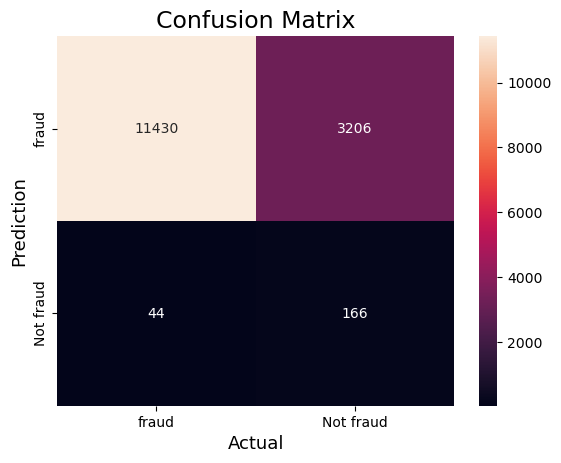

Fold 2/5
Accuracy: 0.7705105752391217, Recall: 0.7819905213270142, Precision: 0.04679523539421441, F1: 0.8576424474369928
time: 11


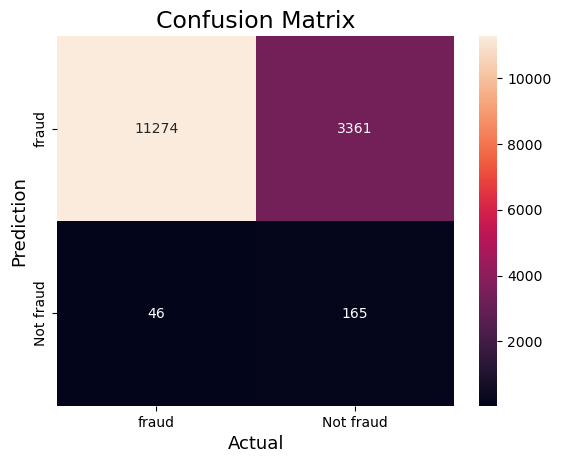

Fold 3/5
Accuracy: 0.7643136198302574, Recall: 0.7630331753554502, Precision: 0.044598337950138504, F1: 0.853659389689102
time: 12


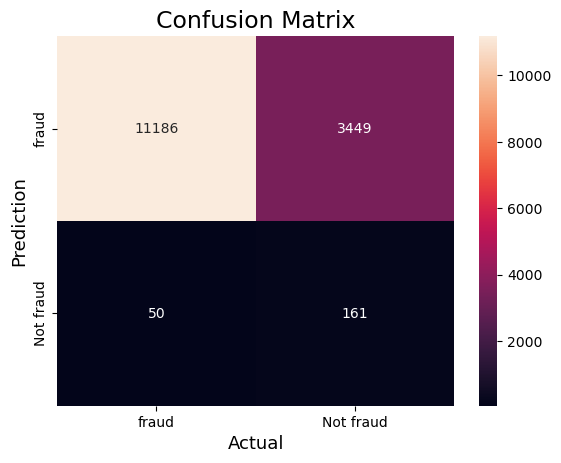

Fold 4/5
Accuracy: 0.7899097399973056, Recall: 0.6872037914691943, Precision: 0.04534083802376485, F1: 0.8700132093126186
time: 13


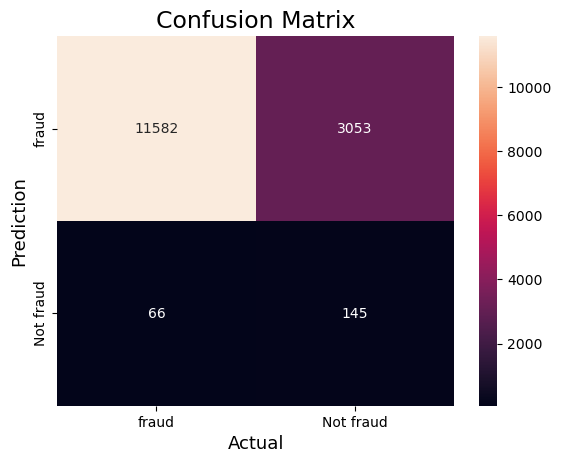

Fold 5/5
Accuracy: 0.7697022767075307, Recall: 0.7819905213270142, Precision: 0.046636517806670434, F1: 0.8571225974175787
time: 13


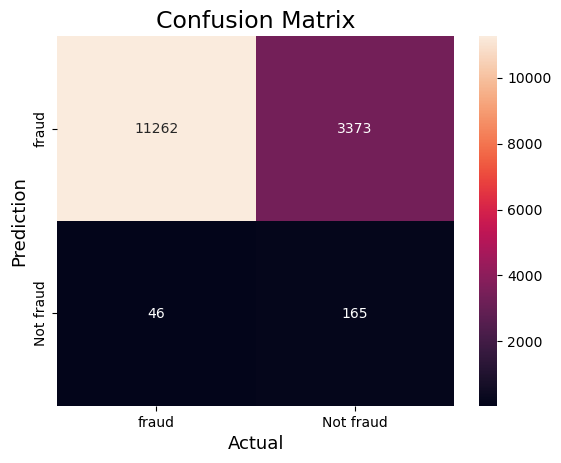

In [135]:
import xgboost as xgb
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
overall_probs = []

for fold, (train_idx, valid_idx) in enumerate(skf.split(x, y)):
    start = time.time()
    print(f"Fold {fold+1}/{num_folds}")   
    x_train  = x.iloc[train_idx]
    y_train = y.iloc[train_idx]
    
    x_val = x.iloc[valid_idx]
    y_val = y.iloc[valid_idx]
    
    
    sample_weights = compute_sample_weight(
    class_weight="balanced",
    y=y_train 
    )

    model = xgb.XGBClassifier()
    model.fit(x_train,y_train,sample_weight=sample_weights)
    

    y_pred = model.predict(x_val)
    #y_pred_prob = model.predict_proba(x_val)
    
    overall_probs.append(model.predict_proba(test))
    
    
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    
 
    #print(classification_report(actual, predicted))
    print(f'Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1: {f1}')
    end = time.time()
    print("time:",round(end - start))
    cm = confusion_matrix(y_val,y_pred)
    sns.heatmap(cm, 
                annot=True,
                fmt='g', 
                xticklabels=['fraud','Not fraud'],
                yticklabels=['fraud','Not fraud'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()



Text(0.5, 1.0, 'Feature Importance')

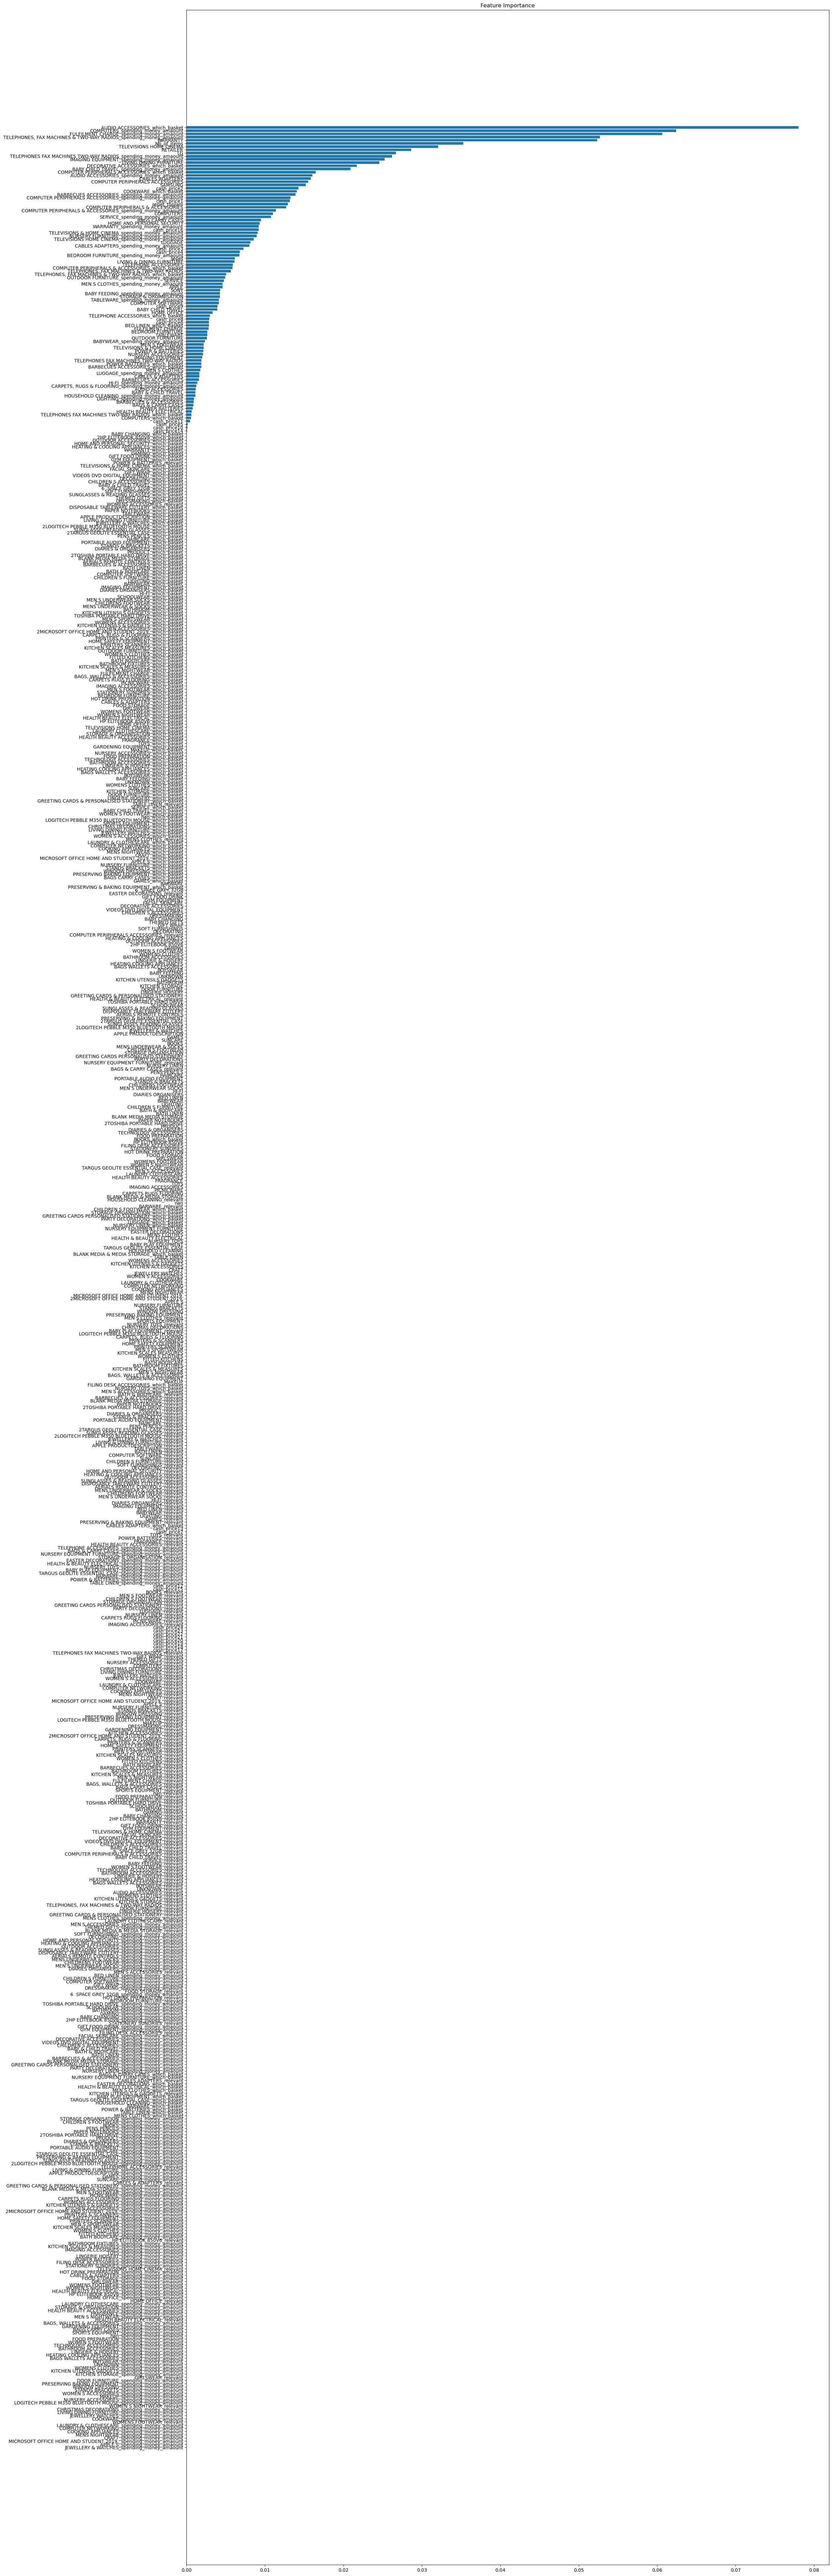

In [136]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(25,100))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(test.columns)[sorted_idx])
plt.title('Feature Importance')

In [137]:
temp = overall_probs
res = temp[0]+temp[1]+temp[2]+temp[3]+temp[4]
res = pd.DataFrame(res/5)
sub["fraud_flag"] = res[1]
sub.fraud_flag.mean()

0.23080337

In [140]:
sub

,ID,fraud_flag
0,38100,0.01
1,13409,0.01
2,56447,0.02
3,70271,0.59
4,11531,0.02
...,...,...
18553,16785,0.61
18554,11514,0.00
18555,3012,0.10
18556,96385,0.08


In [139]:
sub.to_csv("xgb_new_son.csv",index=False)

In [ ]:
# total price
# per item price
# categoray
# per category purcashe
# categoraycal data 


In [ ]:
# a = pd.read_csv("ligtbm_v1_60.csv")
# b = pd.read_csv("catboost_v1.csv")
# c = pd.read_csv("xgboost_v5.csv")
# a["fraud_flag"] = (a["fraud_flag"]+b["fraud_flag"]+c["fraud_flag"])/3
# a["fraud_flag"].mean()